### Polynomial degree features

- A non-linear function can be fit by extending `Linear Regression` with Polynomial features. The technique is known as `Polynomial Regression`
- For `n` features, applying polynomial degree `d` makes `(n+d)! / n! * d!` features (possible feature explosion for higher degrees!)
- For `d=2`, `x` and `x*x` would be included as features. However, for `d=3`, with features `x1` and `x2` - their 3rd degree powers as well as the combinations yielding 3rd degree would be included.

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, SGDRegressor

In [2]:
m = 100

X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.rand(m,1)

In [3]:
polynomial_features = PolynomialFeatures(degree=2, include_bias=False)

X_polynomial = polynomial_features.fit_transform(X)

print("X:{} and X_polynomial: {}".format(X[0], X_polynomial[0]))

X:[-0.94222305] and X_polynomial: [-0.94222305  0.88778428]


In [4]:
linear_regression = LinearRegression()

linear_regression.fit(X_polynomial, y)
print("Intercept:{} and Coefficient: {}".format(linear_regression.intercept_, linear_regression.coef_))

Intercept:[2.54522037] and Coefficient: [[1.01567362 0.5003115 ]]


### Plot Learning Curves

In [5]:
def plot_learning_curves(model, X, y):
    
#     from sklearn.metrics import mean_squared_error
#     from sklearn.model_selection import train_test_split
#     import matplotlib.pyplot as plt
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    m=len(X_train)
    train_err, val_err = [], []
    
    for i in range(1,m):
        
        model.fit(X_train[:i], y_train[:i])
        y_train_pred = model.predict(X_train[:i])
        train_err.append(mean_squared_error(y_train_pred, y_train[:i]))
        
        y_test_pred = model.predict(X_test)
        val_err.append(mean_squared_error(y_test_pred, y_test))
        
    plt.plot(np.sqrt(train_err), "r-", label="Training error")
    plt.plot(np.sqrt(val_err),  "g+", label="Validation error")

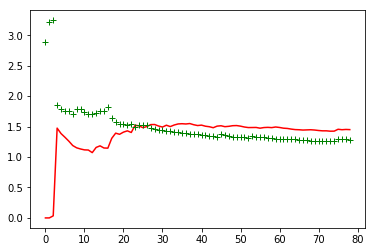

In [6]:
plot_learning_curves(linear_regression, X, y)

### Ridge & Lasso Regressions

- Ridge is Norm-2
- Lasso is Norm-1 (produces sparse model ; acts as a feature selector)
- Both techniques regularize the cost function `y = f(X)`
- Regularization can be controlled with the parameter `alpha` to bring in the Bias-Variance tradeoff

In [7]:
ridge_regression = Ridge(alpha=0.1, solver="cholesky")
lasso_regression = Lasso(alpha=0.1)
sgd_l2 = SGDRegressor(penalty="l2")
sgd_l1 = SGDRegressor(penalty="l2")

ridge_regression.fit(X, y)
lasso_regression.fit(X, y)
sgd_l1.fit(X, y)
sgd_l2.fit(X, y)

print(
    "Predictions\n\n Ridge: {}, Lasso: {}, SGD with L2: {}, , SGD with L1: {}"
    .format(ridge_regression.predict([[1.5]]), 
            lasso_regression.predict([[1.5]]), 
            sgd_l2.predict([[1.5]]),
           sgd_l1.predict([[1.5]])))

ridge_regression = Ridge(alpha=0.1, solver="sag")
ridge_regression.fit(X, y)

print("Ridge with sag-solver: {}".format(ridge_regression.predict([[1.5]])))

Predictions

 Ridge: [[5.72307643]], Lasso: [5.68186645], SGD with L2: [4.79027628], , SGD with L1: [4.81821928]
Ridge with sag-solver: [[5.74723019]]


/home/saileshg/sailspace/dev2019/py3env/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/saileshg/sailspace/dev2019/py3env/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/saileshg/sailspace/dev2019/py3env/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defa

### ElasticNet
- Middle ground between `Ridge` and `Lasso`
- use a hyperparameter `l1_ratio` to control the behaviour

In [8]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.6)
elastic_net.fit(X, y)

print("Elastic Net: {}".format(elastic_net.predict([[1.5]])))

Elastic Net: [5.68164073]
